In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import unidecode
%matplotlib inline

In [4]:
from pattern.en import sentiment, polarity, subjectivity
def sentiment(text):
    return polarity(text)

def subj(text):
    return subjectivity(text)

In [1]:
hilary = pd.read_csv('old_notebooks/hilary_comments2.csv')

In [5]:
hilary['Sentiment'] = hilary.apply(lambda row: sentiment(row['Comment']), axis = 1)
hilary['Subjectivity'] = hilary.apply(lambda row: subj(row['Comment']), axis = 1)
hilary.head()
#hilary.to_csv('hilary_scores')

/Users/datascientist/anaconda/lib/python2.7/site-packages/Pattern-2.6-py2.7.egg/pattern/text/__init__.py:2228: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in map(lambda e: e.lower(), e):


,Unnamed: 0,Comment,URL,Sentiment,Subjectivity
0,0,What Republican wannabe POTUS candidate among ...,http://takingnote.blogs.nytimes.com/2015/09/03...,-0.066911,0.471123
1,1,"Tax Pledges, loyalty pledges but still no pled...",http://takingnote.blogs.nytimes.com/2015/09/03...,0.200000,0.300000
2,2,"Correct me if I'm wrong, but I believe Republi...",http://takingnote.blogs.nytimes.com/2015/09/03...,-0.025000,0.383333
3,3,Trump isn't running for President he is runnin...,http://takingnote.blogs.nytimes.com/2015/09/03...,0.300000,0.200000
4,4,The GOP now owns Trump and all his narrow-mind...,http://takingnote.blogs.nytimes.com/2015/09/03...,0.000000,0.000000


In [10]:
len(hilary)

25000

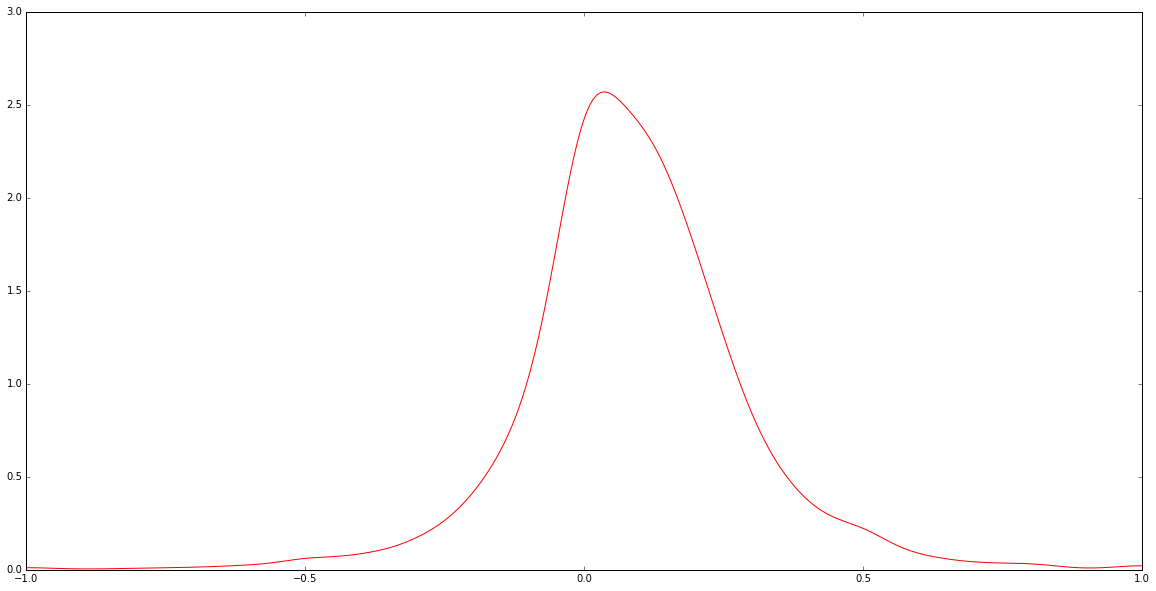

In [9]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(20,10))

data = hilary['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'r', label = 'Hilary')


In [17]:
def remove_html_tags(data):
    p = re.compile(r'<[^<]*?>')
    return p.sub('', data)

In [28]:
content = hilary.ix[0]['Comment']
content = remove_html_tags(content)
content = body_text = unidecode.unidecode(content).replace("\n"," ").replace("\'", " ")


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
  app.launch_new_instance()


'What Republican wannabe POTUS candidate among the 17 entrants in this campaign 2016 circus would want Donald Trump s endorsement?  Trump s written pledge to support whomever the RNC nominates next year is worth bupkes and means diddly.  Trump s nasty pufflicity self-promotional campaign has ignited GOP iggerodies and right wing zealots who don t care who is President - and since getting Obama out of the White House and Oval Office is their only goal, they will achieve it come January 2017.  Pretty far down the road to be making predictions about who will run for the Republicans a year from now. Alas, we, the American people, are the losers. And Donald Trump , if he doesn t explode or implode before these 14 months till Election Day 2016 occurs, will still be saying "you re fired!" to his TV reality show contestants and American couch potato audience.'

In [36]:
def Sentences(paragraph):
    ''' break a paragraph into sentences
        and return a list '''
    import re
    # to split by multile characters

    #   regular expressions are easiest (and fastest)
    sentenceEnders = re.compile('[.!?]')
    sentenceList = sentenceEnders.split(paragraph)
    return sentenceList

In [51]:
s_max = 0
comment_score = 0

for i in Sentences(content):
    print sentiment(i)
    if abs(sentiment(i)) > s_max:
        print "True"
        comment_score = sentiment(i)
        print comment_score
#         s_max = sentiment(i)


0.0
0.15
True
-0.178571428571
True
0.0648148148148
True
-0.2
True
0.0
0.0
0.0


In [47]:
comment_score

0.0